# Wine Quality Analysis
## Created 17-Oct-2024 Mark A. Goforth, Ph.D.

### Purpose
This notebook is designed for EDA and train a DNN model to perform a quality estimation of wine by it's chemical composition.

### Goal

### Challenges & Discussion 

### General Steps for Approach

1) Download data
    - wine quality data is downloaded from kaggle

2) EDA 
    - identify independent variables that influence the outcome

2) Feature Engineering
    - normalize and standardize independent variables as necessary
    - reduce dimensionality

4) Train/Test Split
    - split data for training and final testing to see how performance will be in the real world
    - use random shuffle and stratified split to preserve proportions of classes

5) Model Selection, Cross Validation, and Tuning
    - use K-fold cross validation to reduce bias, build more generalized model and prevent overfitting
    - apply hyperparameter tuning to search for best settings that provide improved bias and variance 

6) Model Validation
    - run model on test set to see how model will perform on real world data

7) Create GAN (TBD)
    - create a Generative Adversarial Network (GAN) deep learning architecture
    - train two neural networks to compete against each other to generate more authentic new data from a given training dataset

8) Create VAE (TBD)
    - create a Variational Autoencoder (VAE) deep learning architecture
    - train neural network to use in anomaly detection
      
### Conclusion


In [ ]:
# install any necessary python packages
!pip install kagglehub

In [ ]:
!pip install tensorflow

In [ ]:
!pip install keras_tuner

# Import Libraries

In [1]:
import datetime
import time

import numpy as np 
import pandas as pd 
# import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy.stats as stats
import statsmodels.api as sm

import pylab as plt
from IPython.display import Image
from IPython.core.display import HTML 
from pylab import rcParams

import sklearn
from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn import datasets

import kagglehub
import ppscore as pps

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn import metrics
from sklearn.metrics import confusion_matrix

import pickle

import tensorflow as tf
from tensorflow.keras import datasets, layers, models, losses
from matplotlib import pyplot as plt

import keras_tuner
import keras


2024-10-20 12:28:59.926457: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Download latest dataset version

In [2]:
pathstr = kagglehub.dataset_download("adarshde/wine-quality-dataset")
print("Path to dataset files:", pathstr)
df = pd.read_csv(pathstr+'/winequality-dataset_updated.csv')
df = df.drop_duplicates()

Path to dataset files: /Users/Mark/.cache/kagglehub/datasets/adarshde/wine-quality-dataset/versions/3


# Exploratory Data Analysis (EDA)

In [3]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.3              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.2              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1760 entries, 0 to 1998
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1760 non-null   float64
 1   volatile acidity      1760 non-null   float64
 2   citric acid           1760 non-null   float64
 3   residual sugar        1760 non-null   float64
 4   chlorides             1760 non-null   float64
 5   free sulfur dioxide   1760 non-null   float64
 6   total sulfur dioxide  1760 non-null   float64
 7   density               1760 non-null   float64
 8   pH                    1760 non-null   float64
 9   sulphates             1760 non-null   float64
 10  alcohol               1760 non-null   float64
 11  quality               1760 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 178.8 KB


In [5]:
df.describe().T.style.background_gradient(axis=0)

## Attribute Information
| Feature | Explain |
| :------ | :------ |
| fixed acidity | most acids involved with wine or fixed or nonvolatile |
| volatile acidity | the amount of acetic acid in wine |
| citric acid | the amount of citric acid in wine |
| residual sugar | the amount of sugar remaining after fermentation stops |
| chlorides | the amount of salt in the wine |
| free sulfur dioxide | the amount of free sulfur dioxide in the wine(those available to react and thus exhibit both germicidal and antioxidant properties) |
| total sulfur dioxide | amount of free and bound forms of SO2 |
| density | the measurement of how tightly a material is packed together |
| PH | describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 |
| Alcohol | the percent alcohol content of the wine |
| quality | output variable (based on sensory data, score between 3 and 8) |

## check for missing values

In [7]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Visualization - create histograms for each independent variable

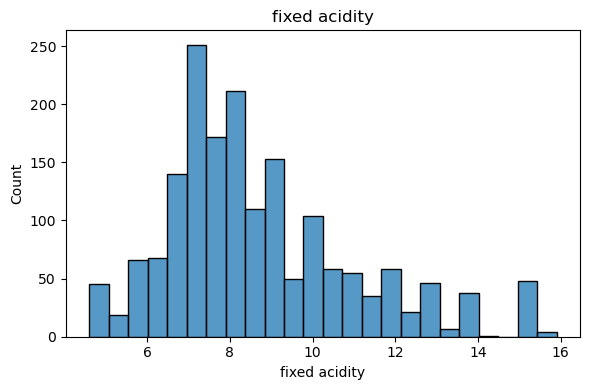

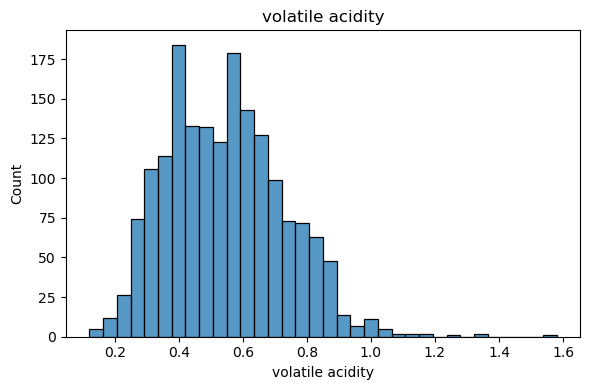

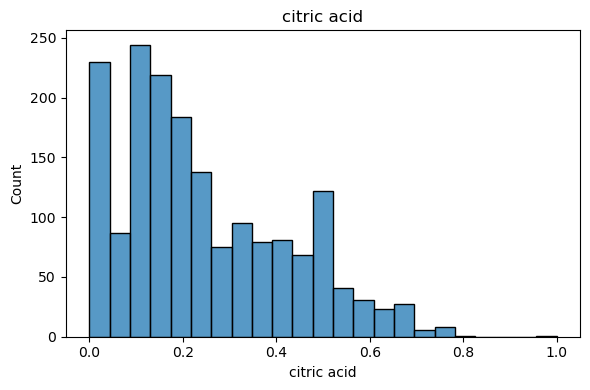

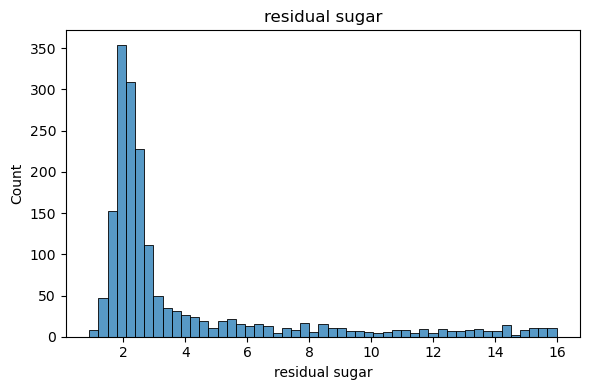

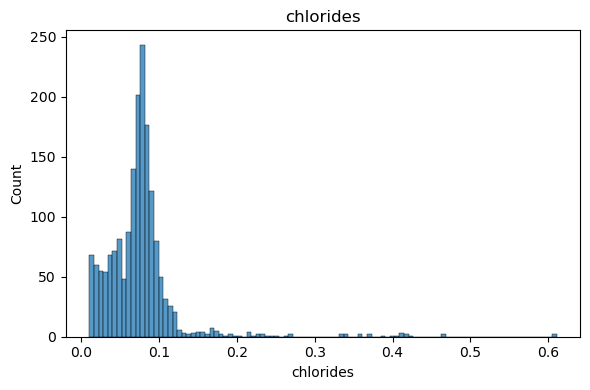

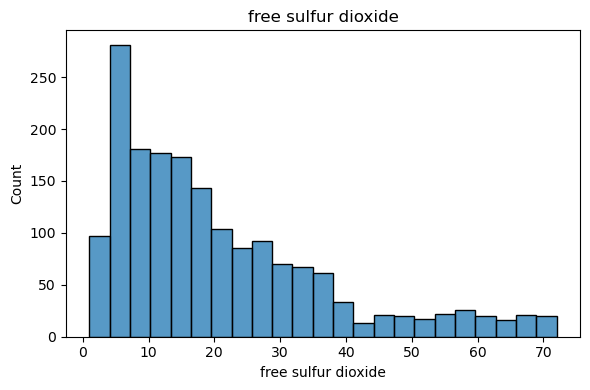

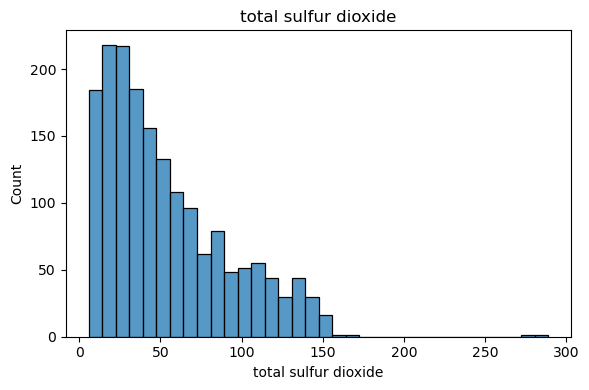

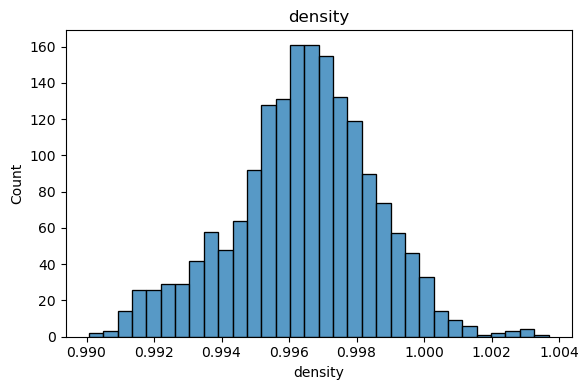

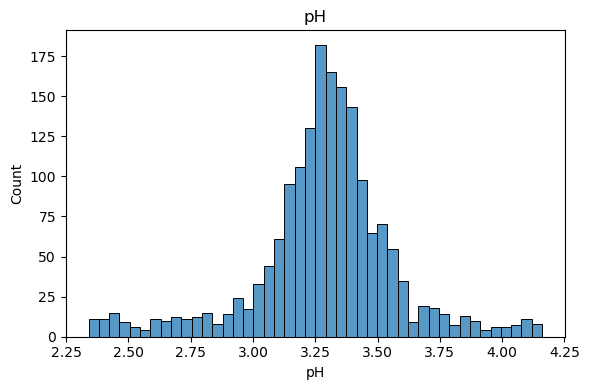

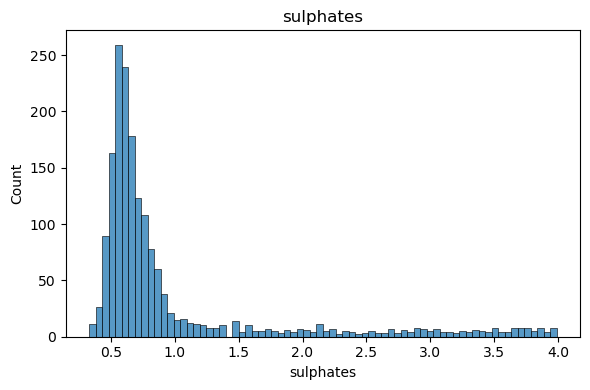

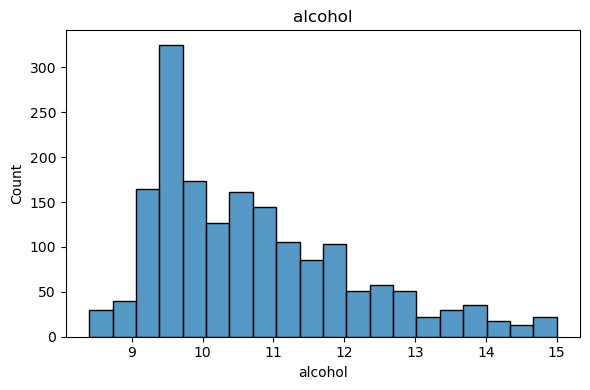

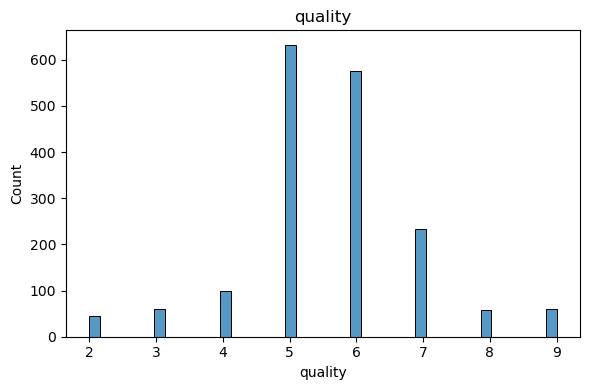

In [8]:
for i in df.columns:
    plt.figure(figsize=(6, 4)) 
    sns.histplot(data=df[i])
    plt.title(f'{i}')
    plt.tight_layout()
    plt.show()

# Visualization - create box plots

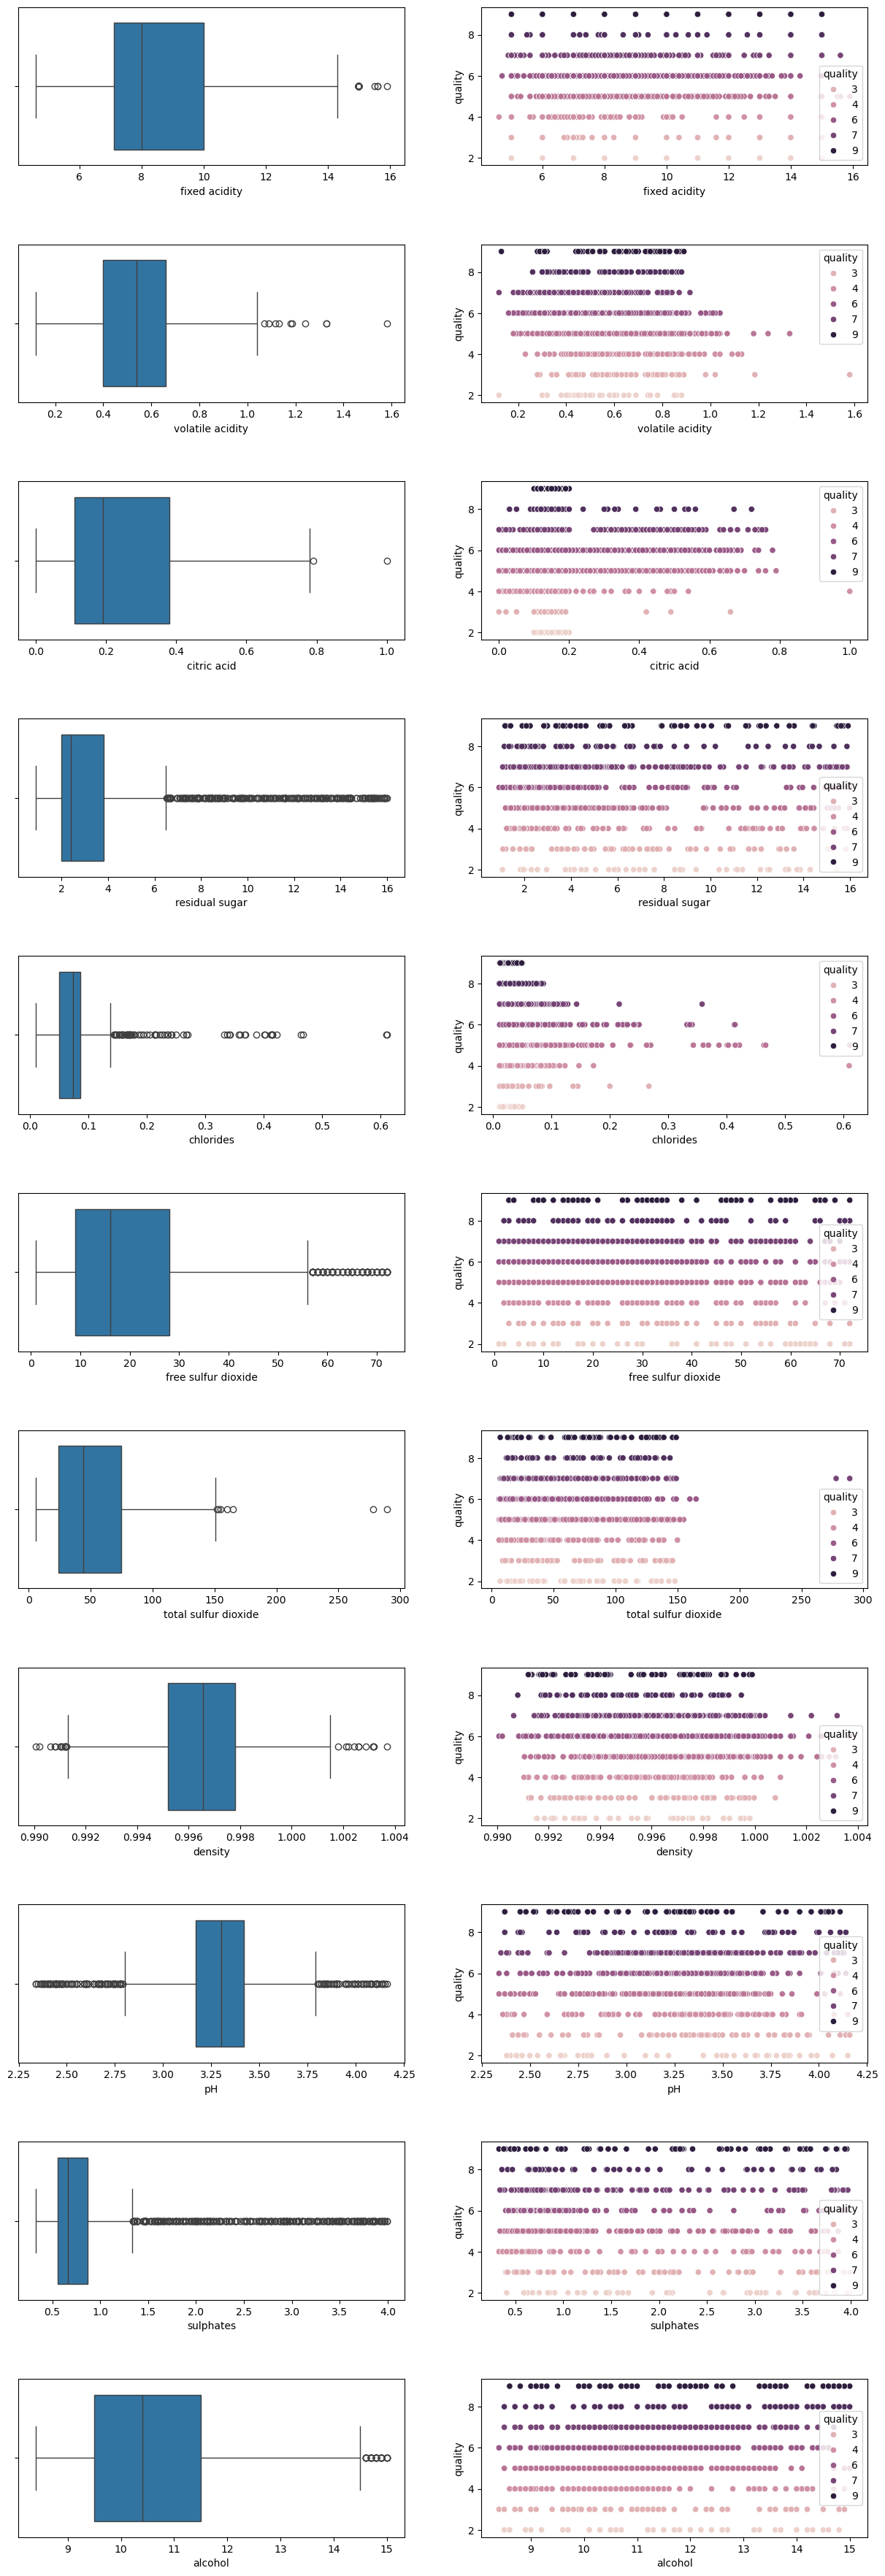

In [9]:
columns = list(df.columns)
fig, ax = plt.subplots(11, 2, figsize=(15, 45))
plt.subplots_adjust(hspace = 0.5)
for i in range(11) :
    # AX 1
    sns.boxplot(x=columns[i], data=df, ax=ax[i, 0])
    # Ax 2
    sns.scatterplot(x=columns[i], y='quality', data=df, hue='quality', ax=ax[i, 1])

# compare each dependent variable with quality using box plots

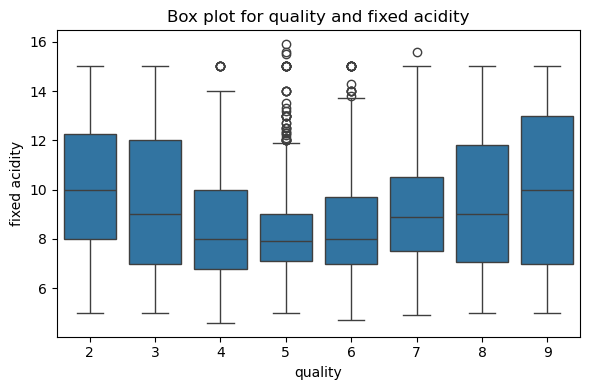

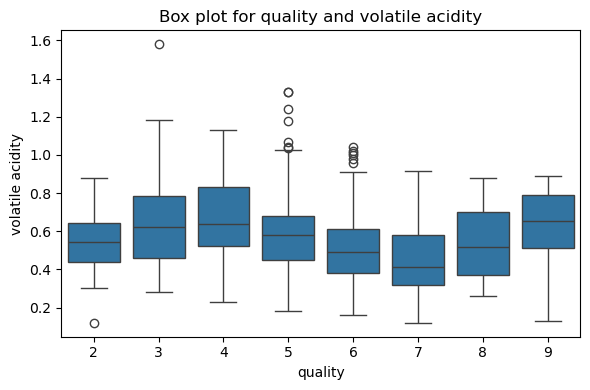

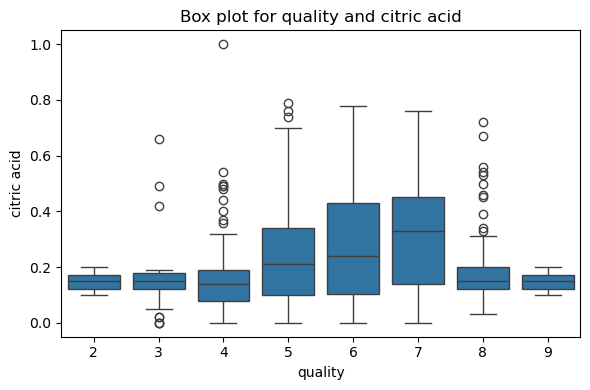

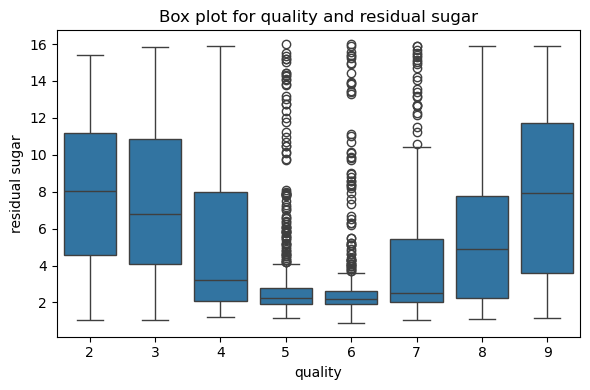

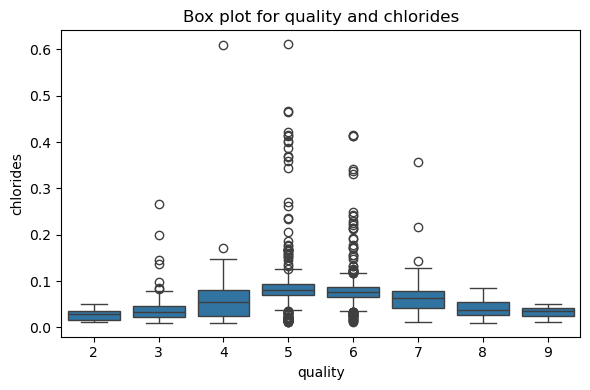

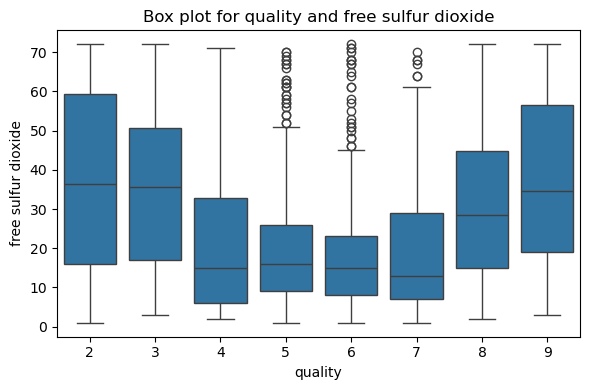

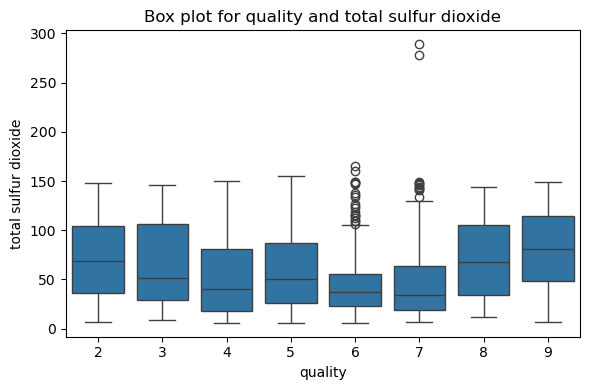

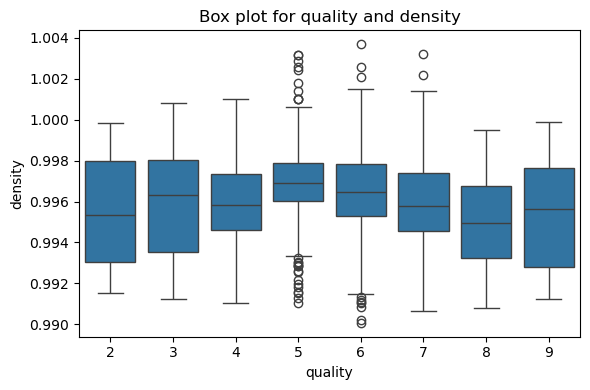

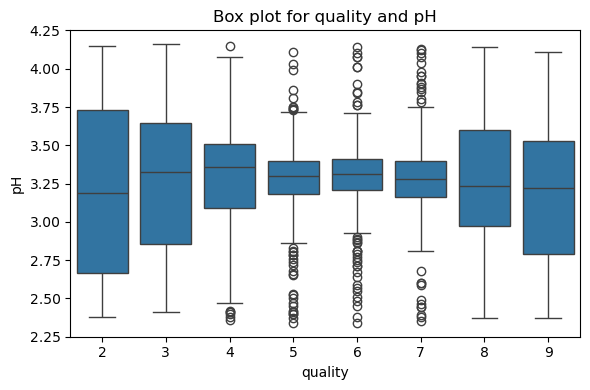

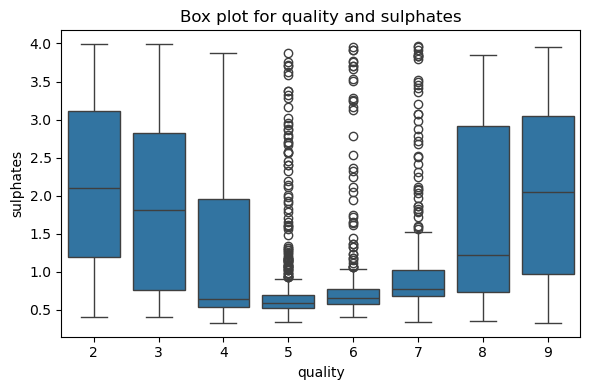

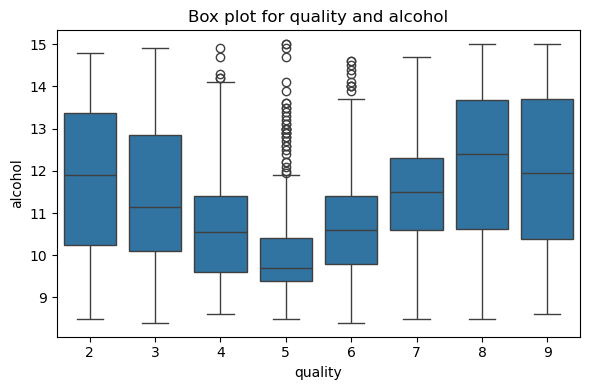

In [11]:
for i in df.columns:
    if i != 'quality':
        plt.figure(figsize=(6, 4))  # Set figure size for each plot
        sns.boxplot(data=df, x='quality', y= i)
        plt.title(f'Box plot for quality and {i}')
        plt.tight_layout()
        plt.show()

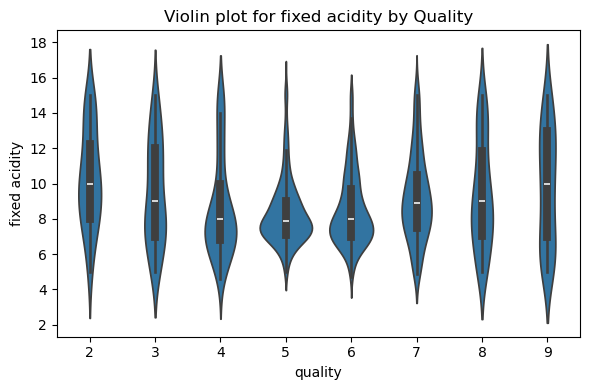

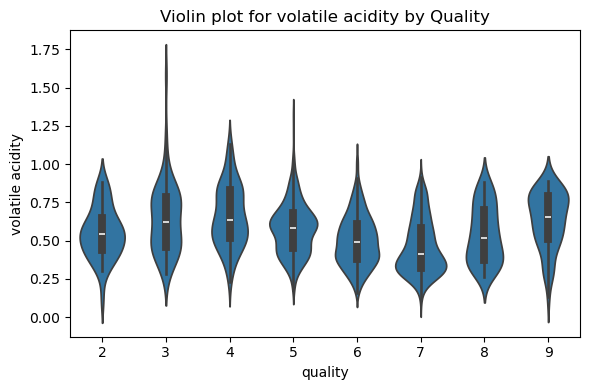

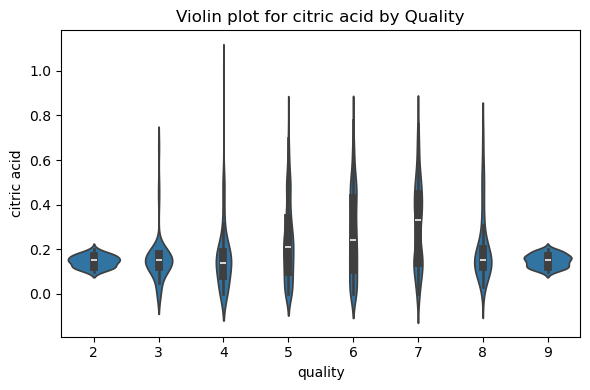

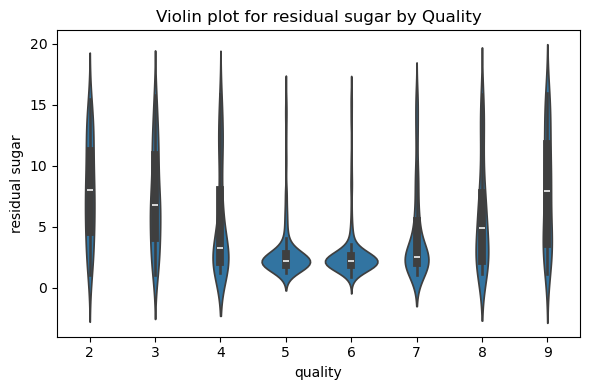

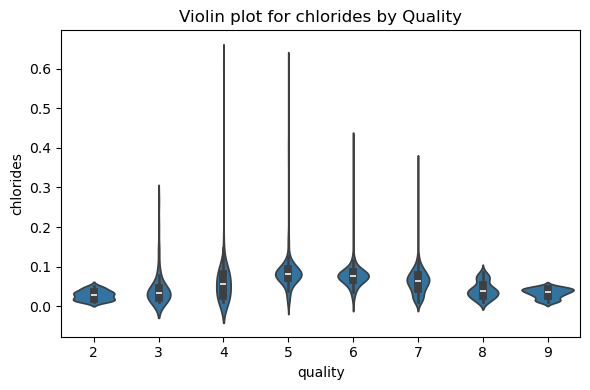

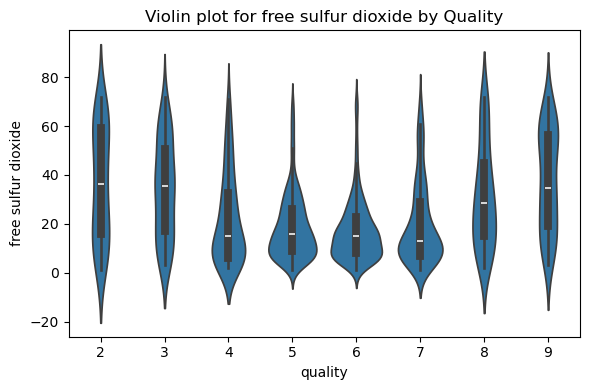

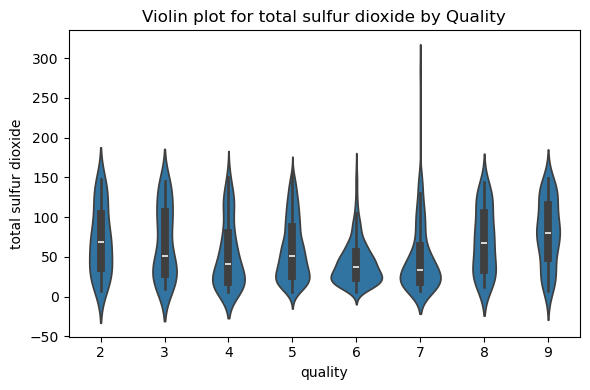

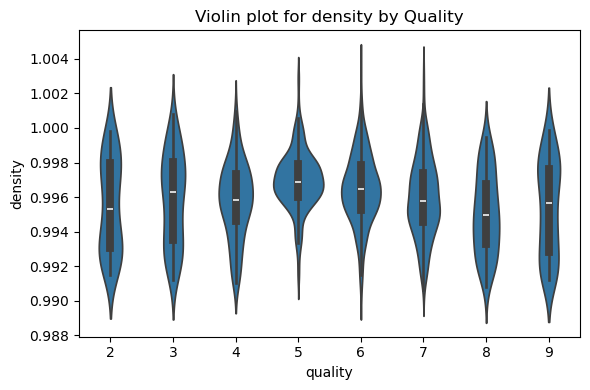

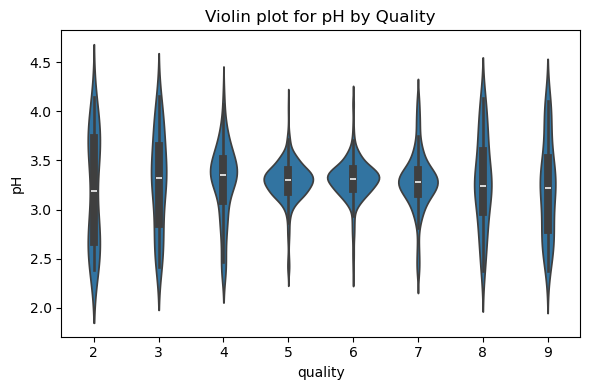

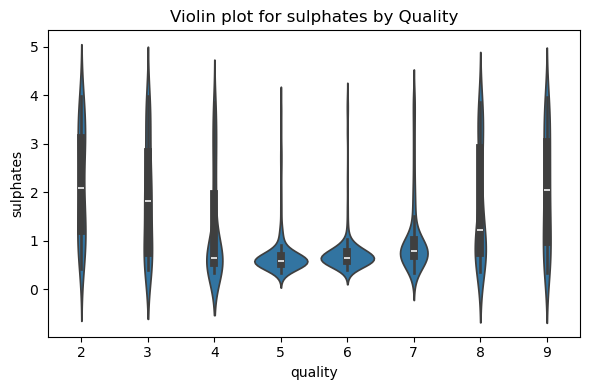

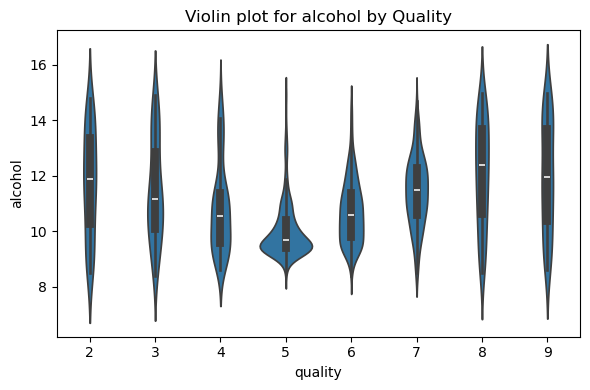

In [12]:
for i in df.columns:
    if i != 'quality':
        plt.figure(figsize=(6, 4))
        sns.violinplot(data=df, x='quality', y=i)
        plt.title(f'Violin plot for {i} by Quality')
        plt.tight_layout()
        plt.show()

# Correlate each dependent variable with quality

In [13]:
%matplotlib inline
rcParams['figure.figsize'] = 12, 10
sns.set_style('whitegrid')

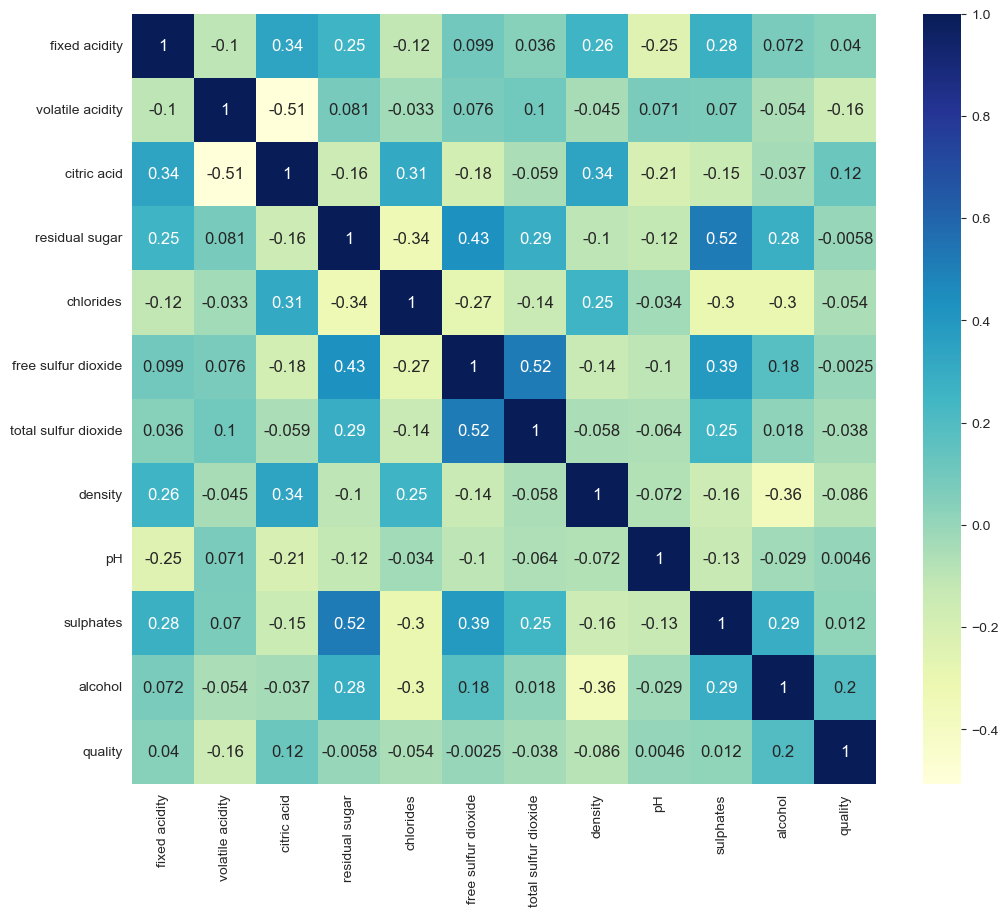

In [14]:
# Plotting the correlation heatmap
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True, annot_kws={"size": 12})

# Displaying heatmap
plt.show()

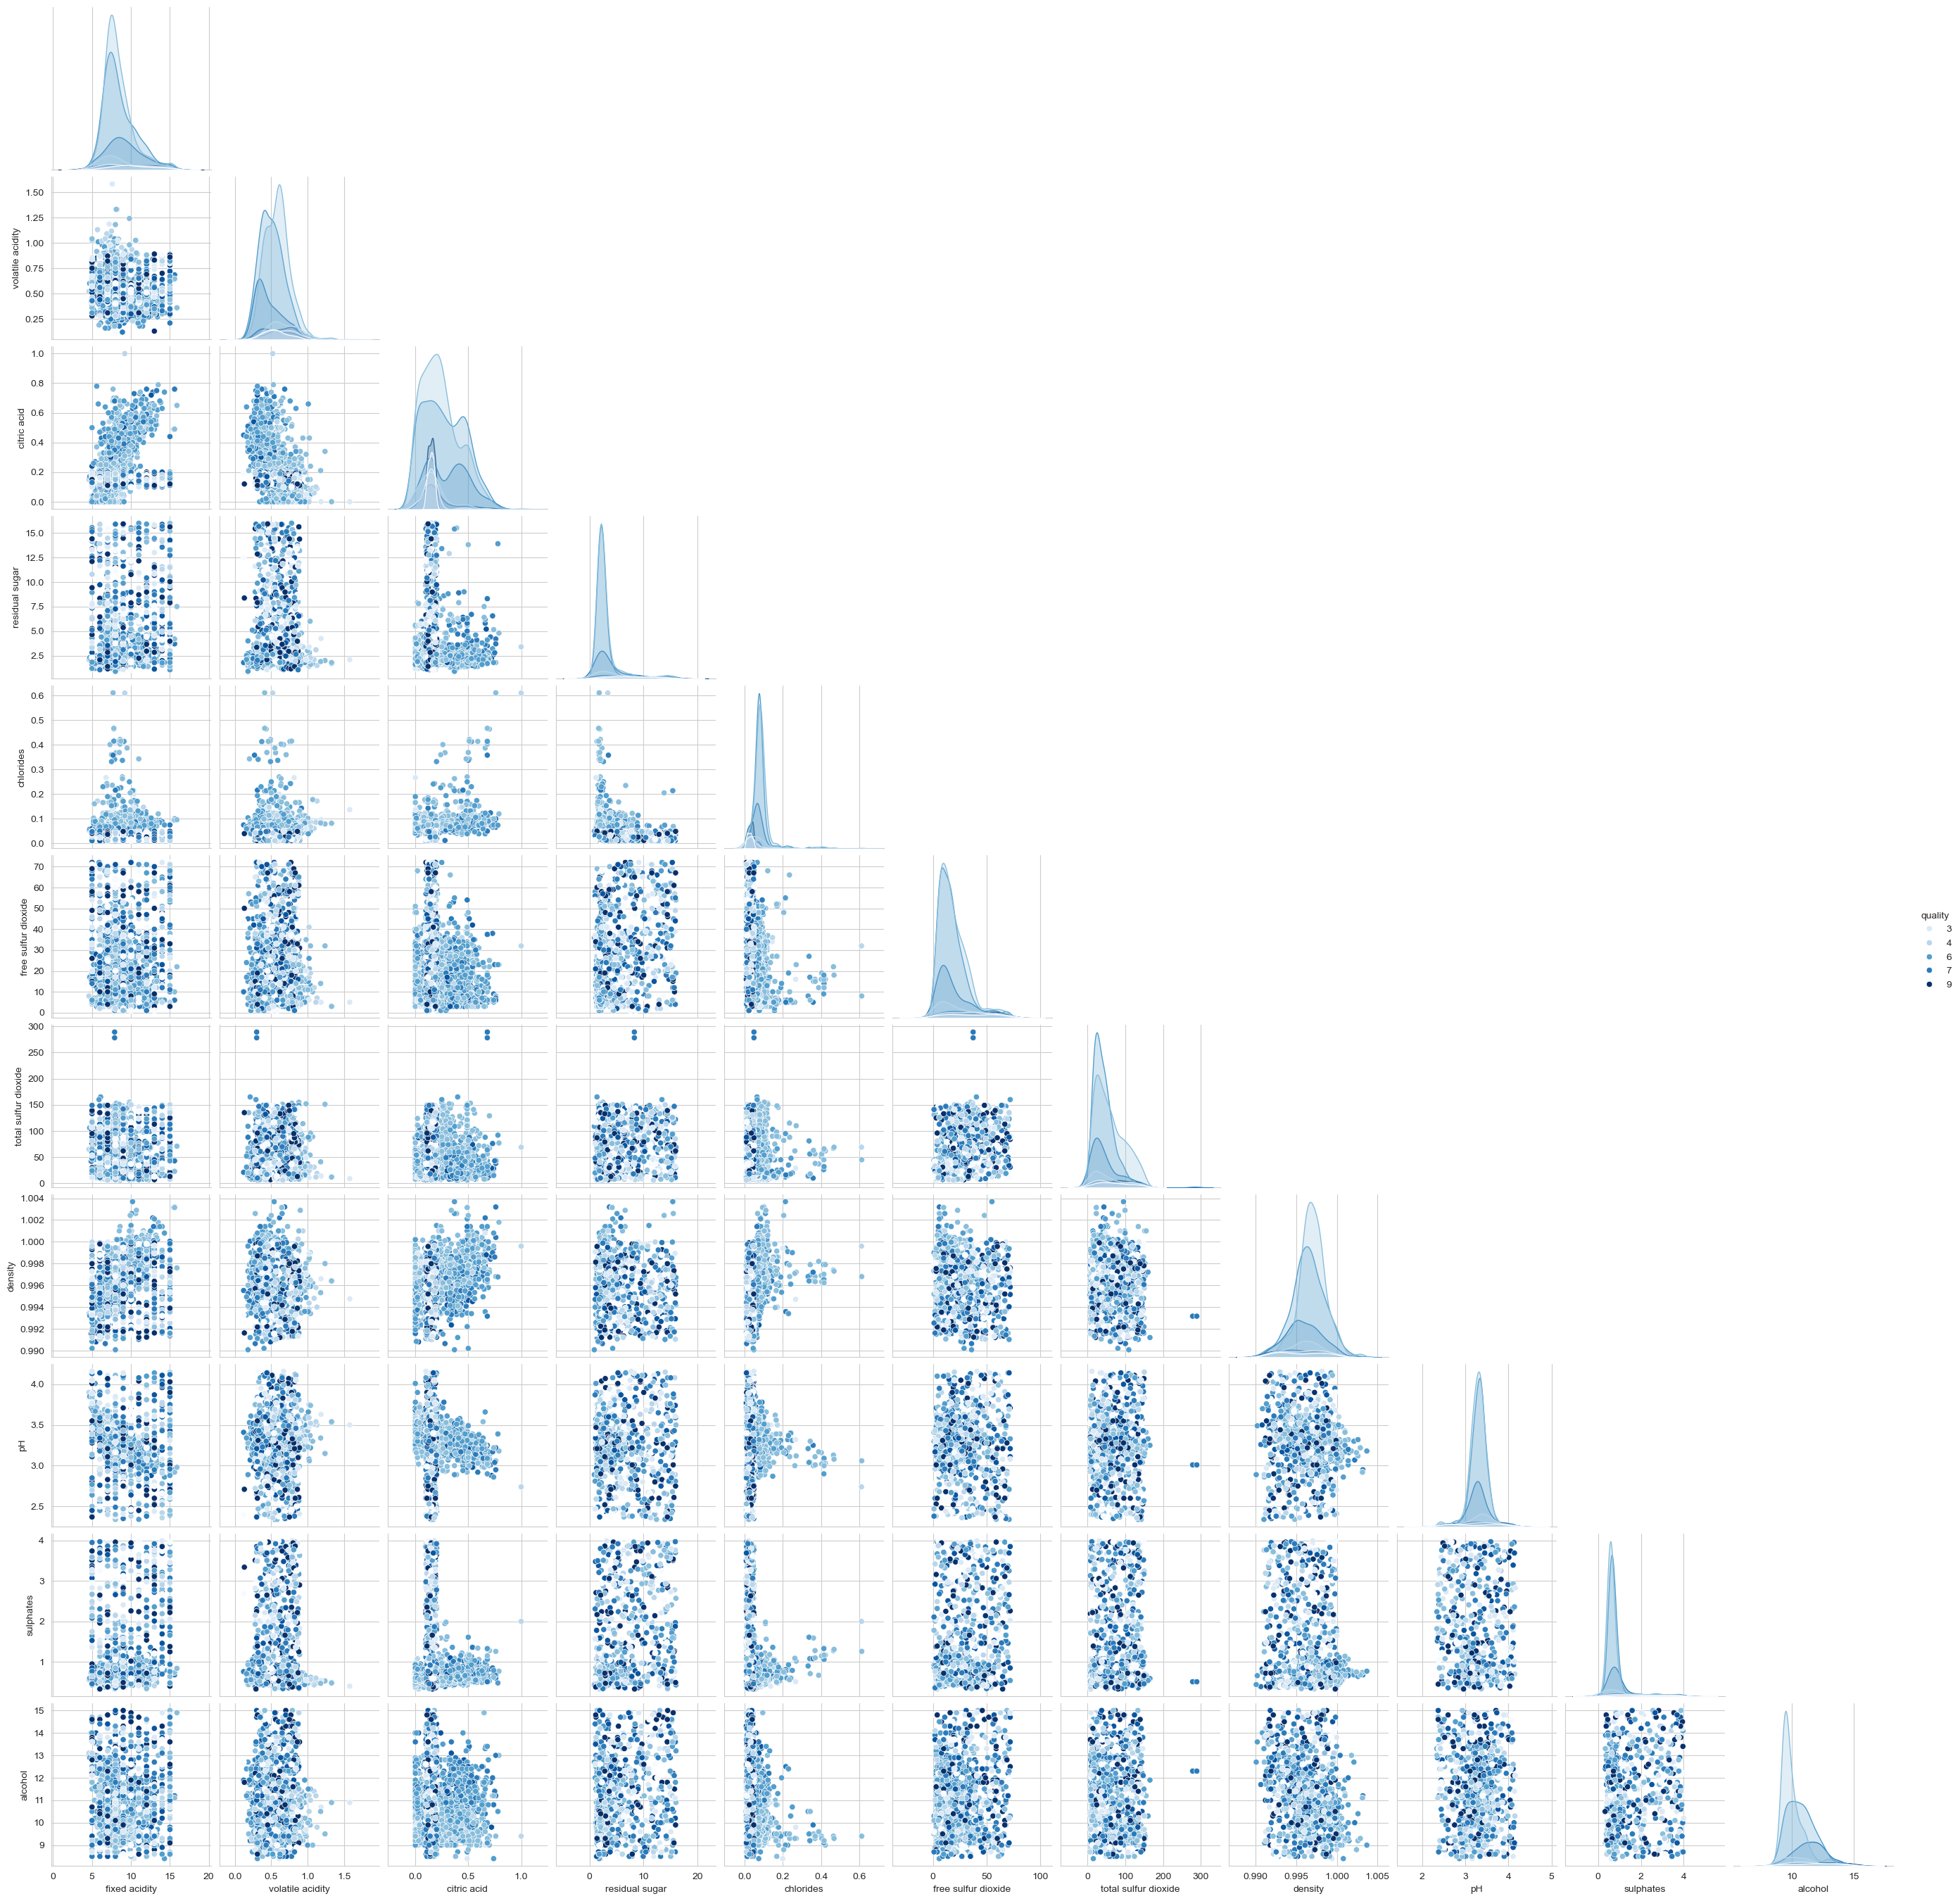

In [15]:
rcParams['figure.figsize'] = 15, 15
sns.pairplot(df, hue='quality', corner = True, palette='Blues')

<Axes: >

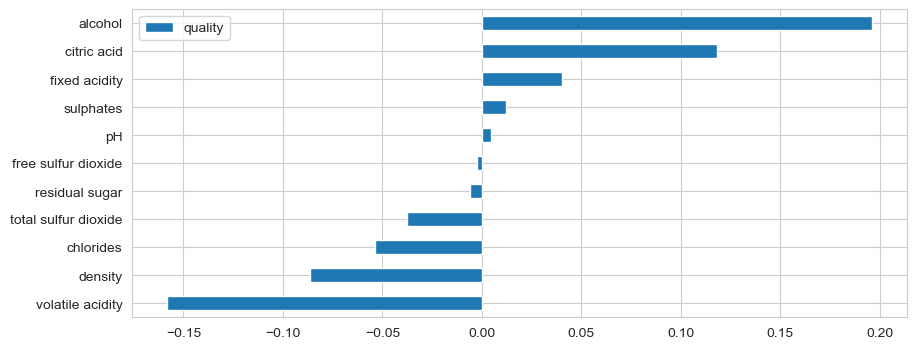

In [16]:
# Plot the top N components
dfc = df.corr().iloc[:-1,-1:].sort_values(by='quality', ascending=True)
# dfc = df.corr().iloc[-1:,:-1].sort_values(by='quality', ascending=False).transpose()
# dfc = dfc.set_index('Source').rename_axis(None)
# dfc = df.corr().iloc[:-1,-1:].sort_values(by='quality', ascending=False).transpose()
# type(dfc)
# dfc.loc['quality'].plot(kind='bar', figsize=(10,4) )
dfc.plot.barh(figsize=(10,4) )

# Prepare data for machine learning training

In [17]:
X = df.drop('quality', axis=1)
variable_names = X.columns

In [18]:
variable_names

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [19]:
X.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.3              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.2              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  
0      9.4  
1      9.8  
2      9.8  
3      9.8  
4      9.4

In [20]:
pca = decomposition.PCA()
wine_pca = pca.fit_transform(X)
explained_variance = pca.explained_variance_ratio_

In [21]:
comps = pd.DataFrame(pca.components_, columns=variable_names)
comps

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0        0.002627          0.000503    -0.000344        0.028497  -0.000205   
1        0.016668          0.000230    -0.002320        0.081072  -0.000844   
2        0.321359          0.000777     0.000026        0.928018  -0.004029   
3       -0.943642          0.011013    -0.033403        0.321132  -0.000738   
4        0.009065         -0.011031     0.004401       -0.146875  -0.007204   
5       -0.061430          0.020873    -0.042513       -0.081280  -0.005116   
6        0.035398          0.118715    -0.174634       -0.000466  -0.022120   
7        0.023222          0.787008    -0.580439       -0.008426  -0.028641   
8       -0.017816          0.602446     0.783734        0.004263   0.130421   
9        0.004173         -0.053869    -0.124076        0.001785   0.990743   
10       0.000203          0.001271     0.003326        0.000036   0.003688   

    free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0              0.244696              0.969158 -0.000004 -0.000523   0.005899   
1              0.965255             -0.246279 -0.000019 -0.001673   0.017862   
2             -0.089868             -0.006305  0.000001 -0.011790   0.109290   
3             -0.012454             -0.003658 -0.000299  0.027195  -0.027042   
4             -0.010019              0.004919 -0.000524  0.001574   0.099087   
5             -0.008396             -0.001221 -0.000298 -0.012820   0.987354   
6              0.000611              0.000135 -0.000363  0.976547   0.004652   
7             -0.001187             -0.000008 -0.001059 -0.200759  -0.042043   
8              0.001325             -0.000519  0.003855  0.070416   0.022155   
9              0.000187              0.000063  0.003171  0.006645   0.002232   
10            -0.000001             -0.000002 -0.999987  0.000145  -0.000203   

     alcohol  
0   0.001288  
1   0.021218  
2   0.123671  
3   0.059466  
4   0.983975  
5  -0.110666  
6  -0.000471  
7   0.014280  
8   0.002678  
9   0.007200  
10 -0.000483

<Axes: >

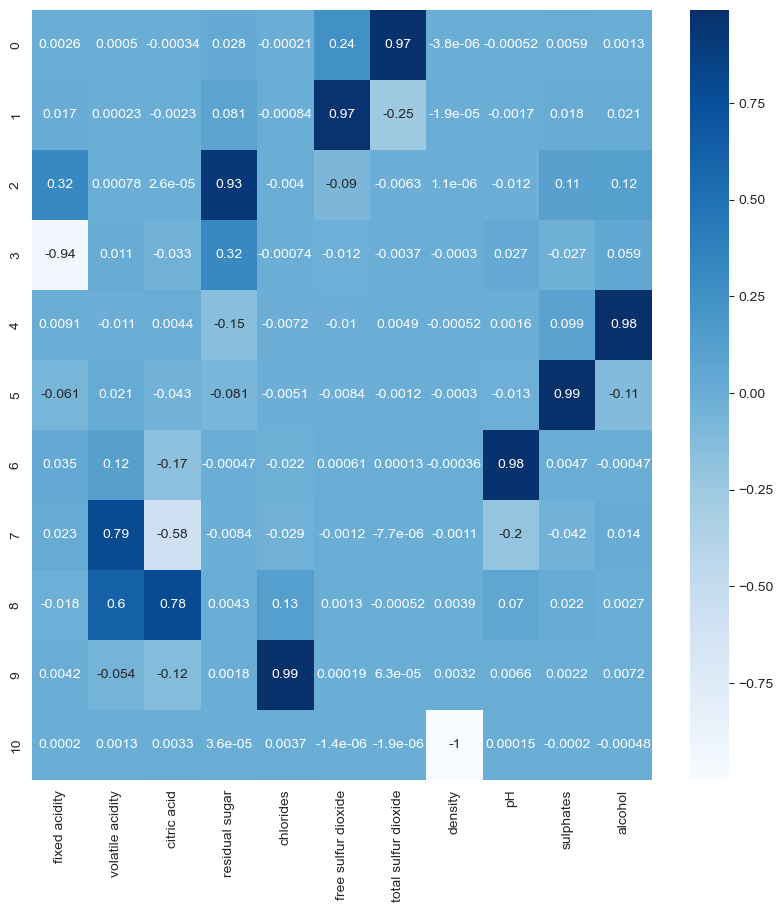

In [23]:
rcParams['figure.figsize'] = 10, 10
sns.heatmap(comps, cmap='Blues', annot=True )

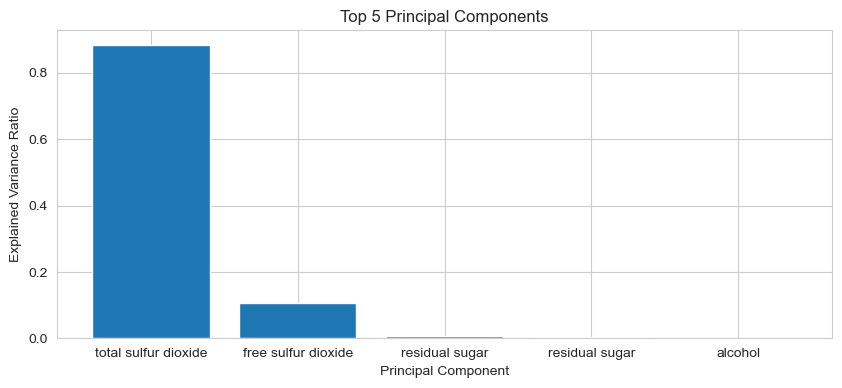

In [24]:
# Plot the top N components
maxcol = np.argmax(pca.components_, axis=1)
n_components = 5  # Number of top components to display
rcParams['figure.figsize'] = 10, 4
plt.bar(range(0, n_components ), explained_variance[:n_components])
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Top {} Principal Components'.format(n_components))
plt.xticks(np.arange(5), variable_names[maxcol[0:5]])
plt.show()

In [25]:
ppscore_list = [pps.score(df, colName, 'quality') for colName in variable_names]
df_pp_score = pd.DataFrame(ppscore_list).sort_values('ppscore', ascending=False)
# df_pp_score

In [26]:
df_pp_score

x        y   ppscore        case  is_valid_score  \
10               alcohol  quality  0.004587  regression            True   
0          fixed acidity  quality  0.000000  regression            True   
1       volatile acidity  quality  0.000000  regression            True   
2            citric acid  quality  0.000000  regression            True   
3         residual sugar  quality  0.000000  regression            True   
4              chlorides  quality  0.000000  regression            True   
5    free sulfur dioxide  quality  0.000000  regression            True   
6   total sulfur dioxide  quality  0.000000  regression            True   
7                density  quality  0.000000  regression            True   
8                     pH  quality  0.000000  regression            True   
9              sulphates  quality  0.000000  regression            True   

                 metric  baseline_score  model_score                    model  
10  mean absolute error        0.973295     0.968831  DecisionTreeRegressor()  
0   mean absolute error        0.973295     1.000633  DecisionTreeRegressor()  
1   mean absolute error        0.973295     1.000094  DecisionTreeRegressor()  
2   mean absolute error        0.973295     0.975877  DecisionTreeRegressor()  
3   mean absolute error        0.973295     1.129688  DecisionTreeRegressor()  
4   mean absolute error        0.973295     1.010453  DecisionTreeRegressor()  
5   mean absolute error        0.973295     1.018520  DecisionTreeRegressor()  
6   mean absolute error        0.973295     1.036547  DecisionTreeRegressor()  
7   mean absolute error        0.973295     1.173801  DecisionTreeRegressor()  
8   mean absolute error        0.973295     1.065762  DecisionTreeRegressor()  
9   mean absolute error        0.973295     1.053535  DecisionTreeRegressor()

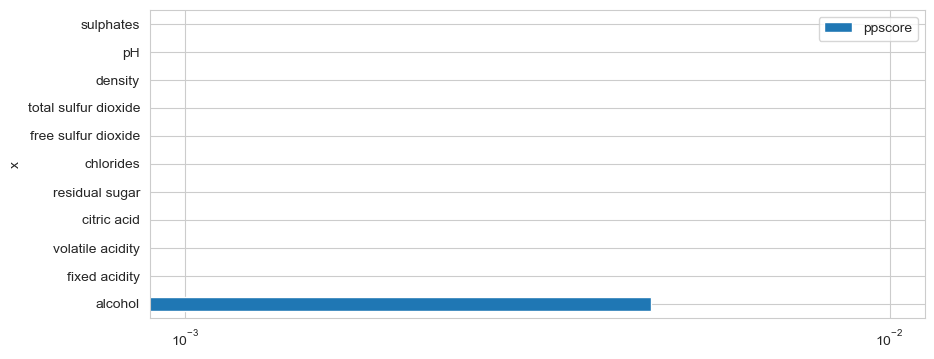

In [27]:
ax = df_pp_score.plot.barh(x='x',y='ppscore')
ax.set_xscale('log')

# normalize data

In [28]:
# Create X from DataFrame and y as Target
X_temp = df.drop(columns='quality')
y = df.quality

In [29]:
scaler = MinMaxScaler(feature_range=(0, 1)).fit_transform(X_temp)
X = pd.DataFrame(scaler, columns=X_temp.columns)
X.describe().T.style.background_gradient(axis=0, cmap='Blues')

## total count for each label

In [30]:
df.quality.value_counts()

5    632
6    575
7    233
4     98
3     60
9     60
8     58
2     44
Name: quality, dtype: int64

In [31]:
# Convert labels to one-hot encoding
y = tf.keras.utils.to_categorical(y)

In [32]:
# Split Dataframe
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [33]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [34]:
#------------------------------------------------------------------------------
# hyperparameter tuning function
#------------------------------------------------------------------------------
def build_model(hp):

    print(hp)

    inputs = keras.Input(shape=(11, 11, 9))
    x = inputs

    n_layers = hp.Int( "n_layers", 2, 24 )
    nodeunits = hp.Int( 'units', 4, 32 )
    dropout =hp.Float( "dropout",0,0.25)
    learning_rate = hp.Float( "learning_rate", 0.00001, 10 )
    # batch_size = hp.Float( "batch_size", 4, 64 )
    optimizer = hp.Choice( "optimizer", ["adam", "adamax"] )

    # model = keras.Sequential()
    # model.add(keras.layers.Dense(
    #     hp.Choice('units', [8, 16, 32]),
    #     activation='relu'))
    # model.add(keras.layers.Dense(1, activation='relu'))
    # model.compile(loss='mse')

    #--------------------------------------
    # configure model
    #--------------------------------------

    #	number of hidden layers
    #	number of neurons
    #	activation function (relu)
    #	output layer (sigmoid for binary classification; softmax for binary or multiclass)

    # initialize ANN
    ann = tf.keras.models.Sequential()

    # add hidden layers
    for i in range(n_layers):
        ann.add(tf.keras.layers.Dense(nodeunits,activation="relu"))
    
    if dropout > 0:
        x = layers.Dropout(dropout)(x)

    # create output layer (number of units = number of classes)
    # ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))
    ann.add(tf.keras.layers.Dense(units=10,activation="softmax"))

    # compile model
    # optimizers:
    #   Adam (good), AdamW, Adadelta, Adagrad, Adamax (good), Nadam, Ftrl (bad), Lion (very noise loss), SGD (good but takes alot of epochs)
    if optimizer == "adamax":
        opt = tf.keras.optimizers.Adamax(learning_rate)
    else:
        opt = tf.keras.optimizers.Adam(learning_rate)

    #	loss function
    #   mse, binary_crossentropy, categorical_crossentropy

    #	metrics (accuracy)

    ann.compile(optimizer=opt,loss="categorical_crossentropy",metrics=['accuracy'])

    return ann

In [35]:
# train DNN model

# run start time
print("start time: "+str(datetime.datetime.now()))
starttime = time.time()

numtrials = 200
numepochs = 25

# fitout = ann.fit( X_train, Y_train, batch_size=batchsize, validation_data=(X_test,Y_test), epochs=numepochs )

hp = keras_tuner.HyperParameters()

# hp.values["model_type"] = 

hp.Float(
    "learning_rate",
    min_value=0.0001,
    max_value=0.1,
    sampling="log" )

hp.Int(
    "n_layers",
    min_value=2,
    max_value=4 )

hp.Int(
    "units",
    min_value=11,
    max_value=11 )

hp.Float(
    "dropout",
    min_value=0.0,
    max_value=0.05 )

hp.Int(
    "batch_size",
    min_value=4,
    max_value=32 )

hp.Choice(
    "optimizer",
     ["adam"] )

# hyperparameter tuning
dts = str(datetime.datetime.now().isoformat(timespec="seconds"))
dts = dts.replace(":","")
pathout = "./tuner_"+dts
print("output path: "+pathout)
# tuner = keras_tuner.RandomSearch(
tuner = keras_tuner.BayesianOptimization(
    build_model,
    objective='val_loss', # val_accuracy val_loss
    max_trials=numtrials,
    directory=pathout,
    hyperparameters=hp )

tuner.search( X_train, y_train, epochs=numepochs, validation_data=(X_test,y_test))
tuner.search_space_summary()
tuner.results_summary()

print( datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S") + "  runtime: " + str(round(time.time()-starttime,3)) + " seconds" )

Trial 200 Complete [00h 00m 06s]
val_loss: 1.4633156061172485

Best val_loss So Far: 1.1767619848251343
Total elapsed time: 00h 17m 25s
Search space summary
Default search space size: 6
learning_rate (Float)
{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.1, 'step': None, 'sampling': 'log'}
n_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 4, 'step': 1, 'sampling': 'linear'}
units (Int)
{'default': None, 'conditions': [], 'min_value': 11, 'max_value': 11, 'step': 1, 'sampling': 'linear'}
dropout (Float)
{'default': 0.0, 'conditions': [], 'min_value': 0.0, 'max_value': 0.05, 'step': None, 'sampling': 'linear'}
batch_size (Int)
{'default': None, 'conditions': [], 'min_value': 4, 'max_value': 32, 'step': 1, 'sampling': 'linear'}
optimizer (Choice)
{'default': 'adam', 'conditions': [], 'values': ['adam'], 'ordered': False}
Results summary
Results in ./tuner_2024-10-20T123331/untitled_project
Showing 10 best trials
Objective(name="val_

In [36]:
# return the best hyperparameters
best_hp = tuner.get_best_hyperparameters()[0]
ann = tuner.hypermodel.build(best_hp)

In [37]:
# select the best model
best_model = tuner.get_best_models()[0]
best_model.summary()

/opt/anaconda3/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           120 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 516 (2.02 KB)

 Trainable params: 516 (2.02 KB)

 Non-trainable params: 0 (0.00 B)

In [38]:
numepochs = 30
# fitout = ann.fit( X_train, Y_train, batch_size=batchsize, validation_data=(X_test,Y_test), epochs=numepochs )
fitout = ann.fit( X_train, y_train, validation_data=(X_test,y_test), epochs=numepochs )

# save model
modelfilename = "ANN.keras"
ann.save(modelfilename)

# load model from file
# ann = models.load_model(modelfilename)

# print metrics
ann.summary()

Epoch 1/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2670 - loss: 1.9892 - val_accuracy: 0.3659 - val_loss: 1.4808
Epoch 2/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3236 - loss: 1.5679 - val_accuracy: 0.3636 - val_loss: 1.3920
Epoch 3/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3861 - loss: 1.4584 - val_accuracy: 0.4136 - val_loss: 1.3231
Epoch 4/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4487 - loss: 1.3159 - val_accuracy: 0.4614 - val_loss: 1.2638
Epoch 5/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4401 - loss: 1.3395 - val_accuracy: 0.4455 - val_loss: 1.3174
Epoch 6/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4725 - loss: 1.3255 - val_accuracy: 0.4705 - val_loss: 1.2288
Epoch 7/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4831 - loss: 1.3172 - val_accuracy: 0.4886 - val_loss: 1.2574
Epoch 8/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4457 - loss: 1.3168 - val_accuracy: 0.4795 - val_loss:

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           120 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,550 (6.06 KB)

 Trainable params: 516 (2.02 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,034 (4.04 KB)

In [39]:
# accuracy metrics
history = fitout.history

acc = history['accuracy']
loss = history['loss']
val_acc = history['val_accuracy']
val_loss = history['val_loss']

print("final train accuracy: "+str(acc[-1]))
print("final train loss    : "+str(loss[-1]))

print("final val accuracy: "+str(val_acc[-1]))
print("final val loss    : "+str(val_loss[-1]))

print( datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S") + "  runtime: " + str(round(time.time()-starttime,3)) + " seconds" )


final train accuracy: 0.4856060743331909
final train loss    : 1.2303400039672852
final val accuracy: 0.4954545497894287
final val loss    : 1.219757080078125
2024-10-20 12:51:56  runtime: 1105.25 seconds


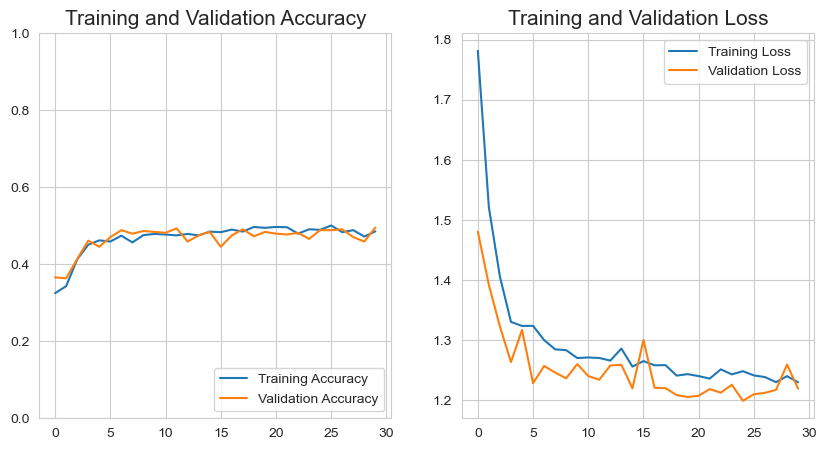

In [40]:
epochs_range = range(numepochs)

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot( epochs_range, acc, label='Training Accuracy' )
plt.plot( epochs_range, val_acc, label='Validation Accuracy' )
plt.legend( loc='lower right' )
plt.ylim(0,1)
plt.title('Training and Validation Accuracy', fontsize=15 )

plt.subplot(1,2,2)
plt.plot( epochs_range, loss, label='Training Loss' )
plt.plot( epochs_range, val_loss, label='Validation Loss' )
plt.legend( loc='upper right' )
# plt.ylim(0,1)
plt.title('Training and Validation Loss', fontsize=15 )

plt.show()

# Run inference on test data to validate performance

In [41]:
# define a function to ploting Confusion matrix
def plot_confusion_matrix(y_test, y_prediction):
    '''Plotting Confusion Matrix'''
    cm = metrics.confusion_matrix(y_test, y_prediction)
    ax = plt.subplot()
    ax = sns.heatmap(cm, annot=True, fmt='', cmap="Blues")
    ax.set_xlabel('Prediced labels', fontsize=18)
    ax.set_ylabel('True labels', fontsize=18)
    ax.set_title('Confusion Matrix', fontsize=25)
    ax.xaxis.set_ticklabels(['Bad', 'Good', 'Middle'])
    ax.yaxis.set_ticklabels(['Bad', 'Good', 'Middle']) 
    plt.show()

In [42]:
# define a function to ploting Classification report
def clfr_plot(y_test, y_pred) :
    ''' Plotting Classification report'''
    cr = pd.DataFrame(metrics.classification_report(y_test, y_pred_rf, digits=3,
                                            output_dict=True)).T
    cr.drop(columns='support', inplace=True)
    sns.heatmap(cr, cmap='Blues', annot=True, linecolor='white', linewidths=0.5).xaxis.tick_top()

In [43]:
def clf_plot(y_test, y_pred) :
    '''
    1) Ploting Confusion Matrix
    2) Plotting Classification Report
    '''

    y_predmax = np.argmax(y_pred, axis=1) 
    y_testmax = np.argmax(y_test, axis=1)

    # metrics.f1_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred))
    # metrics.f1_score(y_test, y_pred, average='weighted',zero_division=0)

    cm = metrics.confusion_matrix(y_testmax, y_predmax)
    cr = pd.DataFrame(metrics.classification_report(y_testmax, y_predmax, digits=3, output_dict=True)).T
    cr.drop(columns='support', inplace=True)
    
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    
    # Left AX : Confusion Matrix
    ax[0] = sns.heatmap(cm, annot=True, fmt='', cmap="Blues", ax=ax[0])
    ax[0].set_xlabel('Prediced labels', fontsize=18)
    ax[0].set_ylabel('True labels', fontsize=18)
    ax[0].set_title('Confusion Matrix', fontsize=25)
    # ax[0].xaxis.set_ticklabels(['Bad', 'Good', 'Middle'])
    # ax[0].yaxis.set_ticklabels(['Bad', 'Good', 'Middle'])
    
    # Right AX : Classification Report
    ax[1] = sns.heatmap(cr, cmap='Blues', annot=True, linecolor='white', linewidths=0.5, ax=ax[1])
    ax[1].xaxis.tick_top()
    ax[1].set_title('Classification Report', fontsize=25)
    plt.show()

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
[[ 0  1  0  1  0  6  0  5]
 [ 0  1  0  1  0  2  0  2]
 [ 0  2  0  9  5  5  0  1]
 [ 0  0  0 96 50  5  0  9]
 [ 0  0  0 43 96 21  0  1]
 [ 0  3  0  1 20 22  0  7]
 [ 0  1  0  0  2  5  0  6]
 [ 0  2  0  0  1  5  0  3]]


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


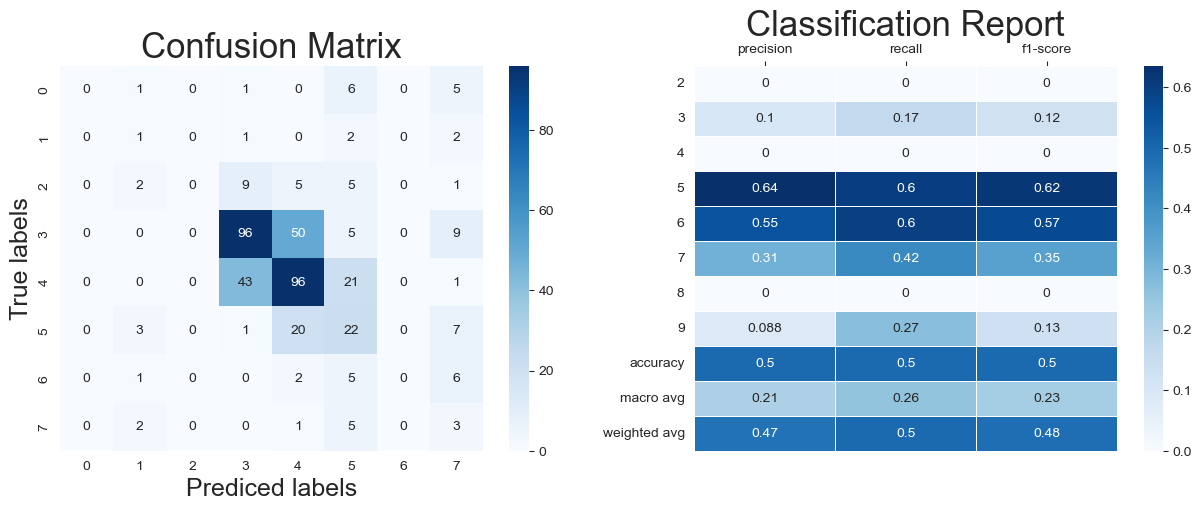

In [44]:
# test predict (inference)

y_pred = ann.predict(X_test)
# y_pred = (y_pred > 0.5)
y_predmax = np.argmax(y_pred, axis=1) 
y_testmax = np.argmax(y_test, axis=1)
cm = confusion_matrix( y_testmax, y_predmax)
print(cm)

#ann_score = round(ann.score(X_test, y_test), 3)
#print('ANN score : ', ann_score)
clf_plot(y_test, y_pred)